In [82]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import torch
    
from ray import tune, air
import seaborn as sns

import utils

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
#experiment_path = "/mnt/storage_1/john/ray_results/dtf_time_frequency_all_not_trainable/"
#experiment_path = "/mnt/storage_1/john/ray_results/dtf_time_frequency_linear_trainable/"

# normalized
#experiment_path = "/home/martinsson/ray_results/dtf_time_frequency_lambda_search_final_linear_v4/" # linear, time-frequency
#experiment_path = "/home/martinsson/ray_results/dtf_time_frequency_lambda_search_final_v4/" # conv, time-frequency
#experiment_path = "/home/martinsson/ray_results/dtf_audio_mnist_lambda_search_final_v3/" # conv and linear, audio mnist

# not normalized
#experiment_path = "/home/martinsson/ray_results/dtf_time_frequency_lambda_search_linear/" #linear, time-frequency
#experiment_path = "/home/martinsson/ray_results/dtf_time_frequency_lambda_search_conv_not_normalized/" #conv, time-frequency

experiment_path = "/home/martinsson/ray_results/dtf_audio_mnist_lambda_search_mel_linear/" #linear, audio-mnist
#experiment_path = "/home/martinsson/ray_results/dtf_audio_mnist_lambda_search_conv_not_normalized/" #conv, audio-mnist



tuner = tune.Tuner.restore(path=experiment_path)
result = tuner.fit()
df = result.get_dataframe()
print(len(df))

/home/martinsson/anaconda3/envs/jupyter/lib/python3.10/site-packages/ray/tune/tuner.py:230: UserWarning: Passing in the experiment's `trainable` will be a required argument to `Tuner.restore` starting from version 2.5. Please specify the trainable to avoid this warning.
  warnings.warn(warning_message)
2023-03-01 11:39:48,531	INFO experiment_analysis.py:789 -- No `self.trials`. Drawing logdirs from checkpoint file. This may result in some information that is out of sync, as checkpointing is periodic.
2023-03-01 11:39:48,801	INFO trial_runner.py:645 -- A local experiment checkpoint was found and will be used to restore the previous experiment state.
2023-03-01 11:39:48,802	INFO trial_runner.py:783 -- Using following checkpoint to resume: /home/martinsson/ray_results/dtf_audio_mnist_lambda_search_mel_linear/experiment_state-2023-03-01_11-24-45.json
2023-03-01 11:39:48,818	WARNING trial_runner.py:788 -- Attempting to resume experiment from /home/martinsson/ray_results/dtf_audio_mnist_lamb

== Status ==
Current time: 2023-03-01 11:39:49 (running for 00:00:00.35)
Memory usage on this node: 1.8/15.6 GiB 
Using FIFO scheduling algorithm.
Resources requested: 0/8 CPUs, 0/1 GPUs, 0.0/7.61 GiB heap, 0.0/3.81 GiB objects (0.0/1.0 accelerator_type:G)
Result logdir: /home/martinsson/ray_results/dtf_audio_mnist_lambda_search_mel_linear
Number of trials: 80/80 (80 TERMINATED)
+----------------------------+------------+-----------------------+--------------+---------+-------------+--------------+-----------+-------------+--------------+--------------+--------------+
| Trial name                 | status     | loc                   |   init_lambd |   lr_tf | trainable   | model_name   |      loss |   lambd_est |   training_i |   best_lambd |   best_valid |
|                            |            |                       |              |         |             |              |           |             |     teration |         _est |         _acc |
|----------------------------+---------

In [126]:
df = result.get_dataframe()
print(np.sort(np.array(list(set(list(df['config/init_lambd']))))/6.38))
print(len(list(df['config/init_lambd']))/len(list(set(list(df['config/init_lambd'])))))
for row in df.iterrows():
    config = utils.get_config_by_row(row)
    break
config

[  2.08986416   5.2246604   10.44932079  20.89864159  41.79728318
  83.59456635 125.39184953 167.18913271]
10.0


{'batch_size': 64,
 'dataset_name': 'audio_mnist',
 'device': 'cuda:0',
 'energy_normalize': True,
 'hop_length': 80,
 'init_lambd': 800.0,
 'lr_model': 0.001,
 'lr_tf': 100.0,
 'max_epochs': 1000,
 'model_name': 'mel_linear_net',
 'n_mels': 128,
 'n_points': 5500,
 'optimized': False,
 'optimizer_name': 'sgd',
 'patience': 10,
 'resample_rate': 8000,
 'trainable': False}

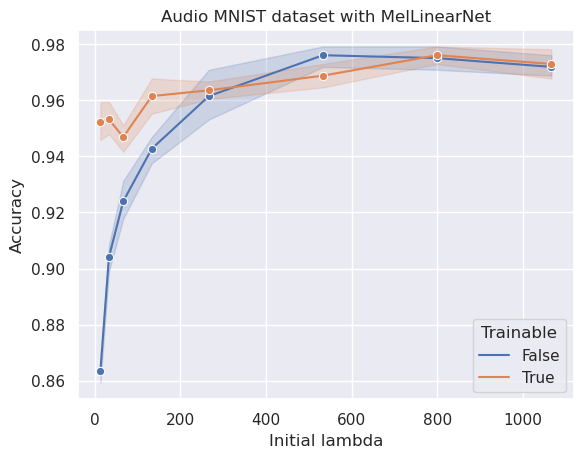

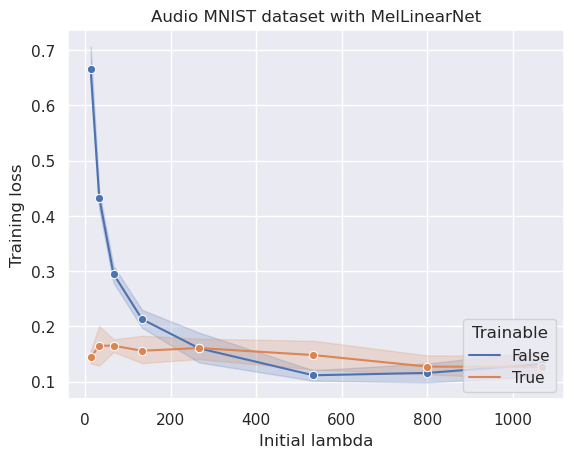

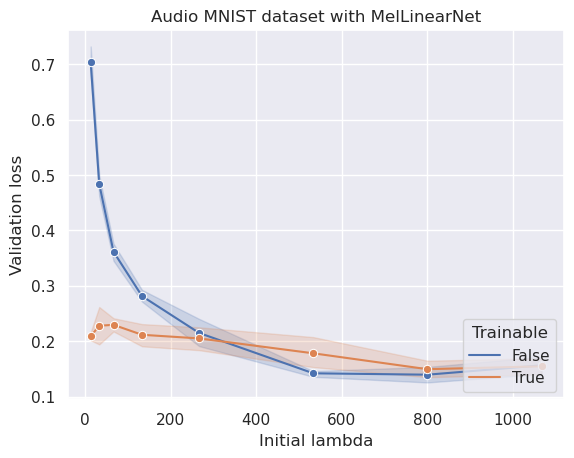

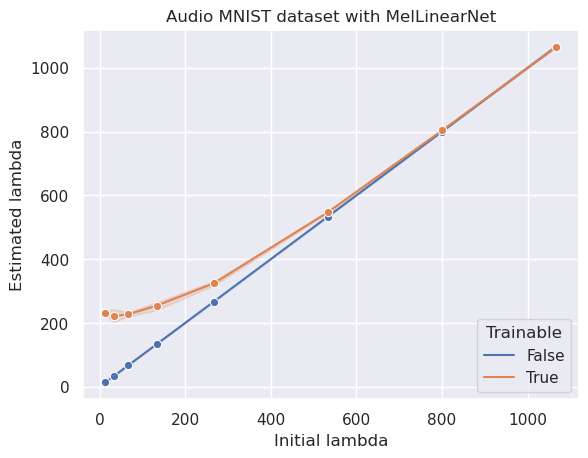

In [127]:
plt.rcParams['text.usetex'] = False
sns.set(font_scale=1.0, rc={'text.usetex' : False})

def get_title(dataset_name, model_name):
    if dataset_name == 'time_frequency':
        dataset_title = "Gaussian-pulse dataset"
    elif dataset_name == 'audio_mnist':
        dataset_title = "Audio MNIST dataset"
    else:
        raise ValueError("dataset_name: {} is not defined.".format(dataset_name))
        
    if model_name == 'conv_net':
        model_title = 'ConvNet'
    elif model_name == 'linear_net':
        model_title = 'LinearNet'
    elif model_name == 'mel_linear_net':
        model_title = 'MelLinearNet'
    elif model_name == 'mel_conv_net':
        model_title = 'MelConvNet'
    else:
        raise ValueError("model_name: {} is not defined.".format(model_name))
        
    return "{} with {}".format(dataset_title, model_title)


dataset_name = 'audio_mnist'
#dataset_name = 'time_frequency'

column_width = 4
figure_height = 3

#model_names = ['conv_net']
#model_names = ['linear_net']

#model_names = ['mel_conv_net']
#model_names = ['mel_linear_net', 'mel_conv_net']
model_names = ['mel_linear_net']

#####################################################################
# Accuracy plot
#####################################################################
# sns.set_theme(style="ticks")
# # sigma search
# g = sns.relplot(data=df, x="config/init_lambd", y='best_valid_acc',
#             kind='line', hue='config/trainable',
#             height=3, aspect=1.61, marker='o', legend=True)
# sns.move_legend(g, "lower left", bbox_to_anchor=(0.2, 0.2))
# g.set_axis_labels('Initial lambda', 'Accuracy')
# g.legend.set_title('Trainable')
# plt.ylim(ylim)
# plt.title(title)
#plt.legend(loc='lower left', title='Trainable')
df = result.get_dataframe()
df = df[(df['config/dataset_name'] == dataset_name)]

for model_name in model_names:
    fig, ax = plt.subplots(1, 1)
    df_model = df[(df['config/model_name'] == model_name)]
    sns.lineplot(data=df_model, x="config/init_lambd", y='best_valid_acc', marker='o', hue='config/trainable')
    
    plt.title(get_title(dataset_name, model_name))# + ", model = {}".format(model_name))
    plt.xlabel('Initial lambda')
    plt.ylabel('Accuracy')
    
    plt.legend(loc='lower right', title='Trainable')
    plt.savefig('figures/sigma_search_{}_{}.pdf'.format(model_name, dataset_name), bbox_inches='tight')

#####################################################################
# Training loss plot
#####################################################################
df = result.get_dataframe()
df = df[(df['config/dataset_name'] == dataset_name)]

for model_name in model_names:
    fig, ax = plt.subplots(1, 1)
    df_model = df[(df['config/model_name'] == model_name)]
    sns.lineplot(data=df_model, x="config/init_lambd", y='loss', marker='o', hue='config/trainable')

    plt.title(get_title(dataset_name, model_name))# + ", model = {}".format(model_name))
    plt.xlabel('Initial lambda')
    plt.ylabel('Training loss')
    
    plt.legend(loc='lower right', title='Trainable')

    plt.show()
#####################################################################
# Valid loss plot
#####################################################################
df = result.get_dataframe()
df = df[(df['config/dataset_name'] == dataset_name)]

for model_name in model_names:
    fig, ax = plt.subplots(1, 1)
    df_model = df[(df['config/model_name'] == model_name)]
    sns.lineplot(data=df_model, x="config/init_lambd", y='best_valid_loss', marker='o', hue='config/trainable')

    plt.title(get_title(dataset_name, model_name))# + ", model = {}".format(model_name))
    plt.xlabel('Initial lambda')
    plt.ylabel('Validation loss')
    
    plt.legend(loc='lower right', title='Trainable')

    plt.show()
    
    
df = result.get_dataframe()
df = df[(df['config/dataset_name'] == dataset_name)]
for model_name in model_names:
    df_model = df[(df['config/model_name'] == model_name)]

    fig = plt.figure()
    g = sns.lineplot(data=df_model, x="config/init_lambd", y='lambd_est',
                hue='config/trainable', marker="o")

    plt.xlabel('Initial lambda')
    plt.ylabel('Estimated lambda')
    plt.legend(loc='lower right', title='Trainable')
    plt.title(get_title(dataset_name, model_name))# + ", model = {}".format(model_name))
    plt.show()
#plt.savefig('figures/sigma_estimate_{}_{}.pdf'.format(model_name, dataset_name), bbox_inches='tight')

240


<Figure size 640x480 with 0 Axes>

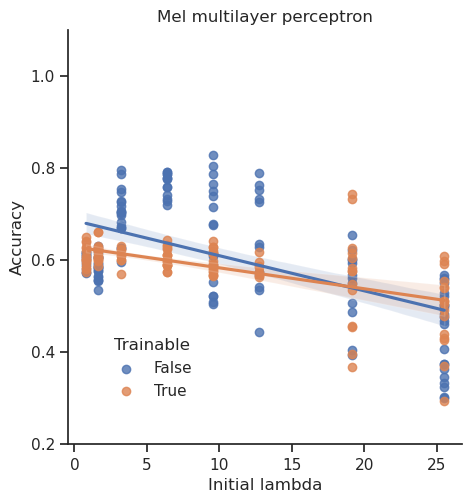

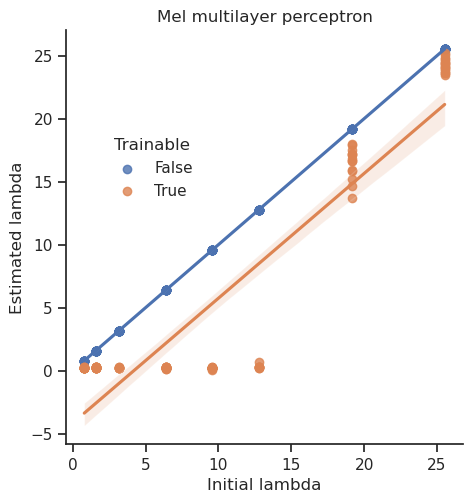

In [92]:
plt.rcParams['text.usetex'] = False
sns.set(font_scale=1.0, rc={'text.usetex' : False})

noise_std = 0.5
model_name = 'linear_net'
dataset_name = 'time_frequency'


df = result.get_dataframe()

df = df[(df['config/noise_std'] == noise_std)]
df = df[(df['config/model_name'] == model_name)]
df = df[(df['config/dataset_name'] == dataset_name)]

#df = df[(df['config/init_lambd'] > 400)]


df['lambd_est'] = df['lambd_est'].apply(np.abs)

print(len(df))

column_width = 4
figure_height = 3

title = "Mel multilayer perceptron"
ylim = [0.2, 1.1]

fig = plt.figure()
# df['config/sigma_scale'] = df['config/sigma_scale'].apply(lambda x: x * sigma_ref)
# df['config/sigma_scale'] = df['config/sigma_scale'].apply(lambda x: round(x, 1))

sns.set_theme(style="ticks")
# sigma search
g = sns.lmplot(data=df, x="config/init_lambd", y='best_valid_acc',
            hue='config/trainable',legend=True, order=1)
sns.move_legend(g, "lower left", bbox_to_anchor=(0.2, 0.2))
g.set_axis_labels('Initial lambda', 'Accuracy')
g.legend.set_title('Trainable')
plt.ylim(ylim)
plt.title(title)
#plt.legend(loc='lower left', title='Trainable')

plt.savefig('figures/sigma_search_{}_{}.pdf'.format(model_name, dataset_name), bbox_inches='tight')

g = sns.lmplot(data=df, x="config/init_lambd", y='lambd_est',
            hue='config/trainable',legend=True, order=1)
sns.move_legend(g, "lower left", bbox_to_anchor=(0.20, 0.6))
g.set_axis_labels('Initial lambda', 'Estimated lambda')
g.legend.set_title('Trainable')
plt.title(title)

#plt.xlim([0, 45])
#plt.ylim([0, 45])
#plt.legend(loc='upper left', title='Trainable')


plt.savefig('figures/sigma_estimate_{}_{}.pdf'.format(model_name, dataset_name), bbox_inches='tight')

In [74]:
x = torch.tensor(1.0)
x.dtype

torch.float32

In [63]:
plt.rcParams['text.usetex'] = False
sns.set(font_scale=1.0, rc={'text.usetex' : False})


min_noise = 0.0
max_noise = 1.0

min_sigma_scale = 0
max_sigma_scale = 4

sigma_ref = 6.38

model_name = 'mlp_net'
dataset_name = 'time_frequency'

for model_name in ['mlp_net']: #'linear_net', 'mlp_net', 'conv_net']:
    for dataset_name in ['time_frequency']:

        df = result.get_dataframe()

        df = df[(df['config/sigma_ref'] == sigma_ref)]
        df = df[(df['config/model_name'] == model_name)]
        df = df[(df['config/dataset_name'] == dataset_name)]

        df = df[df['config/noise_std'] >= min_noise]
        df = df[df['config/noise_std'] <= max_noise]

        df = df[df['config/sigma_scale'] >= min_sigma_scale]
        df = df[df['config/sigma_scale'] <= max_sigma_scale]

        df['lambd_est'] = df['lambd_est'].apply(np.abs)

        print(len(df))

        column_width = 4
        figure_height = 3

        if model_name == 'conv_net':
            ylim = [0.2, 0.8] #1.1]
            title = "Convolutional neural network"
        elif model_name == 'mlp_net':
            title = "Multilayer perceptron"
            ylim = [0.2, 0.8]
        elif model_name == 'linear_net':
            title = "Linear model"
            ylim = [0.2, 0.8]
        else:
            raise ValueError("Model name: {} not defined.".model_name)

        fig = plt.figure()
        df['config/sigma_scale'] = df['config/sigma_scale'].apply(lambda x: x * sigma_ref)
        df['config/sigma_scale'] = df['config/sigma_scale'].apply(lambda x: round(x, 1))

        sns.set_theme(style="ticks")
        # sigma search
        g = sns.relplot(data=df, x="config/sigma_scale", y='accuracy',
                    kind='line', hue='config/trainable',
                    height=3, aspect=1.61, marker='o', legend=True)
        sns.move_legend(g, "lower left", bbox_to_anchor=(0.2, 0.2))
        g.set_axis_labels('Initial lambda', 'Accuracy')
        g.legend.set_title('Trainable')
        plt.ylim(ylim)
        plt.title(title)
        #plt.legend(loc='lower left', title='Trainable')
        
        plt.savefig('figures/sigma_search_{}_{}.pdf'.format(model_name, dataset_name), bbox_inches='tight')

        g = sns.relplot(data=df, x="config/sigma_scale", y='lambd_est',
                    kind='line', hue='config/trainable',
                    height=3, aspect=1.61, marker="o", legend=True)
        sns.move_legend(g, "lower left", bbox_to_anchor=(0.15, 0.6))
        g.set_axis_labels('Initial lambda', 'Estimated lambda')
        g.legend.set_title('Trainable')
        plt.title(title)
        #plt.legend(loc='upper left', title='Trainable')


        plt.savefig('figures/sigma_estimate_{}_{}.pdf'.format(model_name, dataset_name), bbox_inches='tight')

KeyError: 'config/sigma_ref'

37


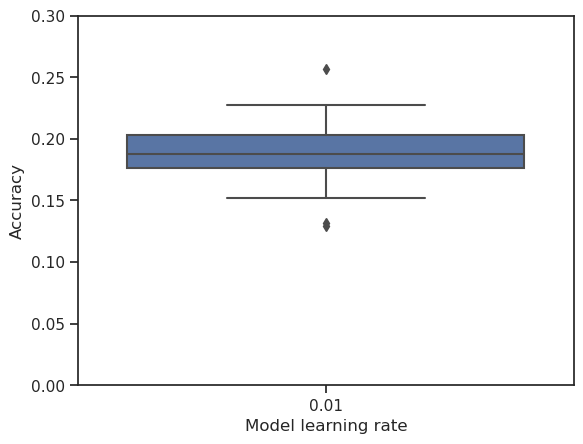

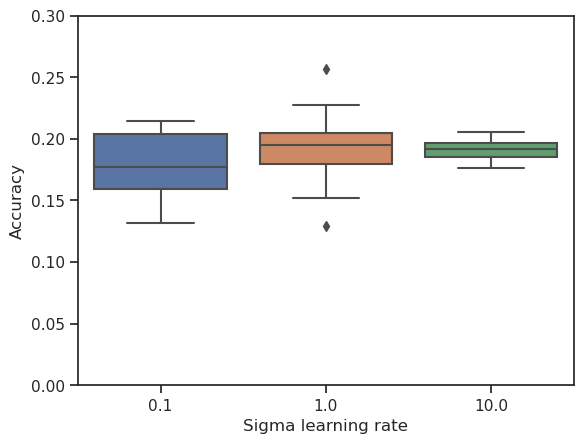

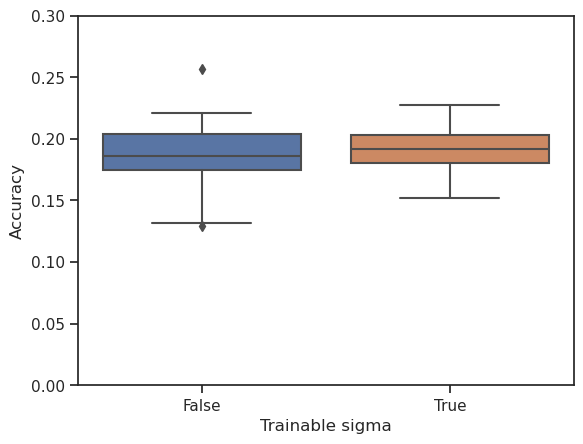

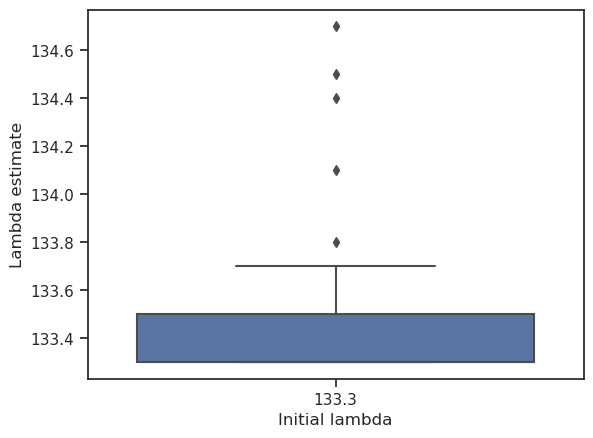

In [60]:
min_noise = 0.0
max_noise = 1.0

sigma_ref = 6.38
#trainable = True

df = result.get_dataframe()
dataset_name = 'time_frequency'
# df = df[(df['config/sigma_scale'] == 3)]
#df = df[(df['config/trainable'] == True)]

# df = df[(df['config/sigma_ref'] == sigma_ref)]
# df = df[(df['config/model_name'] == model_name)]
# df = df[(df['config/dataset_name'] == dataset_name)]
df = df[(df['config/lr_model'] == 0.01)]
#df = df[(df['config/lr_tf'] == 1)]
# df = df[(df['config/energy_normalize'] == True)]


# df = df[(df['config/center_offset'] == True)]

# df = df[df['config/noise_std'] >= min_noise]
# df = df[df['config/noise_std'] <= max_noise]

print(len(df))

ylim = [0.0, 0.3]

fig = plt.figure()
sns.boxplot(data=df, x="config/lr_model", y='accuracy')
plt.ylabel("Accuracy")
plt.ylim(ylim)
plt.xlabel("Model learning rate")
plt.show()

fig = plt.figure()
sns.boxplot(data=df, x="config/lr_tf", y='accuracy')
plt.ylabel("Accuracy")
plt.ylim(ylim)
plt.xlabel("Sigma learning rate")
plt.show()

# fig = plt.figure()
# sns.boxplot(data=df, x="config/sigma_scale", y='accuracy')
# plt.ylabel("Accuracy")
# plt.ylim(ylim)
# plt.xlabel("Sigma scale")
# plt.show()

# fig = plt.figure()
# sns.boxplot(data=df, x="config/energy_normalize", y='accuracy')
# plt.ylabel("Accuracy")
# plt.ylim(ylim)
# plt.xlabel("Energy normalization")
# plt.show()

df['config/init_lambd'] = df['config/init_lambd'].apply(lambda x: round(x, 1))
df['lambd_est'] = df['lambd_est'].apply(lambda x: round(np.abs(x), 1))


fig = plt.figure()
sns.boxplot(data=df, x="config/trainable", y='accuracy')
plt.ylabel("Accuracy")
plt.ylim(ylim)
plt.xlabel("Trainable sigma")
plt.show()

fig = plt.figure()
sns.boxplot(data=df, x="config/init_lambd", y='lambd_est')
plt.ylabel("Lambda estimate")
#plt.ylim(ylim)
plt.xlabel("Initial lambda")
plt.show()

# fig = plt.figure()
# sns.boxplot(data=df, x="config/model_name", y='accuracy')
# plt.ylabel("Accuracy")
# plt.ylim(ylim)
# plt.xlabel("Model")
# plt.show()

# fig = plt.figure()
# sns.boxplot(data=df, x="config/dataset_name", y='accuracy')
# plt.ylabel("Accuracy")
# plt.ylim(ylim)
# plt.xlabel("Dataset")
# plt.show()

# fig = plt.figure()
# sns.boxplot(data=df, x="config/center_offset", y='accuracy')
# plt.ylabel("Accuracy")
# plt.ylim(ylim)
# plt.xlabel("Center offset")
# plt.show()

# fig = plt.figure()
# sns.boxplot(data=df, x="config/noise_std", y='accuracy')
# plt.ylabel("Accuracy")
# plt.ylim(ylim)
# plt.xlabel("Noise std")
# plt.show()

# fig = plt.figure()
# sns.boxplot(data=df, x="config/sigma_ref", y='accuracy')
# plt.ylabel("Accuracy")
# plt.ylim(ylim)
# plt.xlabel("Sigma reference")
# plt.show()

# fig = plt.figure()
# sns.boxplot(data=df, x="config/n_samples", y='accuracy')
# plt.ylabel("Accuracy")
# plt.ylim(ylim)
# plt.xlabel("Number of samples")
# plt.show()

250


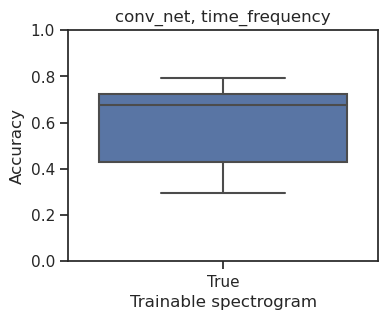

<Figure size 640x480 with 0 Axes>

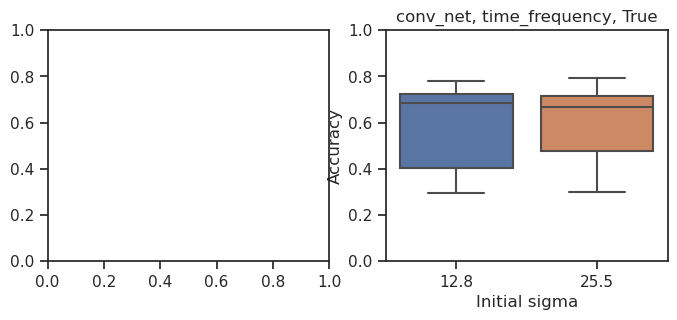

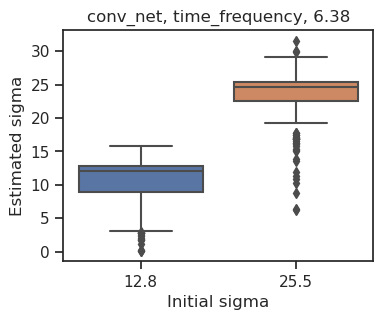

In [501]:
min_noise = 0.0
max_noise = 1.0

min_sigma_scale = 0
max_sigma_scale = 4

sigma_ref = 6.38

model_name = 'conv_net'
dataset_name = 'time_frequency'

# for model_name in ['linear_net', 'mlp_net', 'conv_net']:
#     for dataset_name in ['time', 'frequency', 'time_frequency']:

df = result.get_dataframe()

df = df[(df['config/sigma_ref'] == sigma_ref)]
df = df[(df['config/model_name'] == model_name)]
df = df[(df['config/dataset_name'] == dataset_name)]

df = df[df['config/noise_std'] >= min_noise]
df = df[df['config/noise_std'] <= max_noise]

df = df[df['config/sigma_scale'] >= min_sigma_scale]
df = df[df['config/sigma_scale'] <= max_sigma_scale]

print(len(df))

column_width = 4
figure_height = 3

ylim = [0.0, 1.0] #1.1]



fig = plt.figure(figsize=(column_width, figure_height))
sns.boxplot(data=df, x="config/trainable", y='accuracy')
plt.ylabel("Accuracy")
plt.ylim(ylim)
plt.xlabel("Trainable spectrogram")
plt.title("{}, {}".format(model_name, dataset_name))

plt.savefig('figures/trainable_true_false_{}_{}.pdf'.format(model_name, dataset_name), bbox_inches='tight')

fig = plt.figure()
df['config/sigma_scale'] = df['config/sigma_scale'].apply(lambda x: x * sigma_ref)
df['config/sigma_scale'] = df['config/sigma_scale'].apply(lambda x: round(x, 1))


# sigma search
fig, ax = plt.subplots(1, 2, figsize=(column_width*2, figure_height))

# df_0 = df[df['config/trainable'] == False]
# sns.boxplot(data=df_0, x="config/sigma_scale", y='accuracy', ax=ax[0])
# ax[0].set_ylabel("Accuracy")
# ax[0].set_ylim(ylim)
# ax[0].set_xlabel("Initial sigma")
# ax[0].set_title("{}, {}, {}".format(model_name, dataset_name, False))


df_1 = df[df['config/trainable'] == True]
sns.boxplot(data=df_1, x="config/sigma_scale", y='accuracy', ax=ax[1])
ax[1].set_ylabel("Accuracy")
ax[1].set_ylim(ylim)
ax[1].set_xlabel("Initial sigma")
ax[1].set_title("{}, {}, {}".format(model_name, dataset_name, True))

plt.savefig('figures/sigma_search_{}_{}.pdf'.format(model_name, dataset_name), bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(column_width, figure_height))
df_1['sigma_est'] = df_1['sigma_est'].apply(np.abs)
sns.boxplot(data=df_1, x='config/sigma_scale', y='sigma_est', ax=ax)
ax.set_ylabel("Estimated sigma")
ax.set_xlabel("Initial sigma")
#plt.ylim([0, 6.38])
#plt.xlim([0, 6.38*5.2])
ax.set_title("{}, {}, {}".format(model_name, dataset_name, sigma_ref))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.savefig('figures/sigma_estimate_{}_{}.pdf'.format(model_name, dataset_name), bbox_inches='tight')

399
357
380


<Figure size 640x480 with 0 Axes>

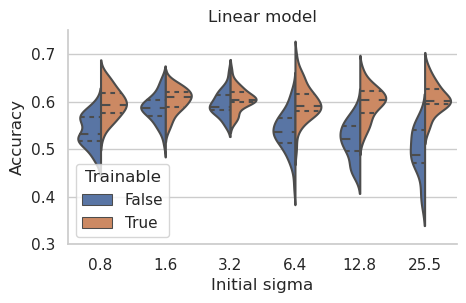

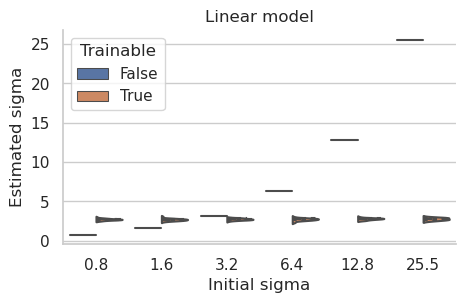

<Figure size 640x480 with 0 Axes>

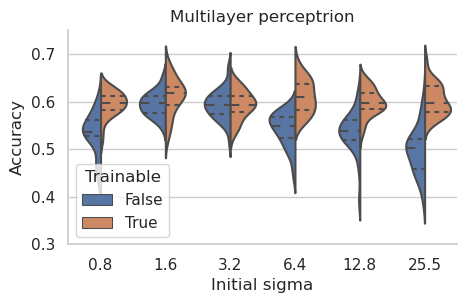

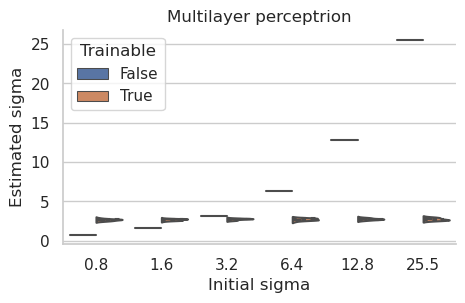

<Figure size 640x480 with 0 Axes>

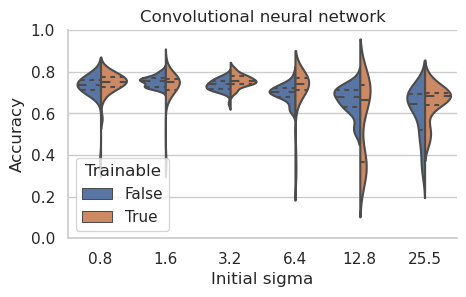

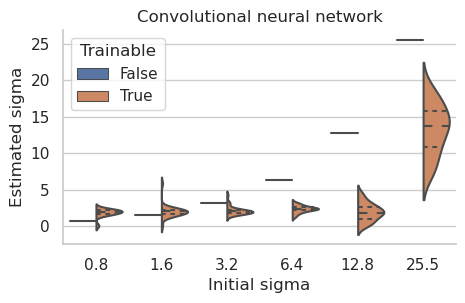

In [462]:
min_noise = 0.0
max_noise = 1.0

min_sigma_scale = 0
max_sigma_scale = 4

sigma_ref = 6.38

model_name = 'conv_net'
dataset_name = 'time_frequency'

for model_name in ['linear_net', 'mlp_net', 'conv_net']:
    for dataset_name in ['time_frequency']:

        df = result.get_dataframe()

        df = df[(df['config/sigma_ref'] == sigma_ref)]
        df = df[(df['config/model_name'] == model_name)]
        df = df[(df['config/dataset_name'] == dataset_name)]

        df = df[df['config/noise_std'] >= min_noise]
        df = df[df['config/noise_std'] <= max_noise]

        df = df[df['config/sigma_scale'] >= min_sigma_scale]
        df = df[df['config/sigma_scale'] <= max_sigma_scale]

        df['sigma_est'] = df['sigma_est'].apply(np.abs)

        print(len(df))

        column_width = 4
        figure_height = 3

        if model_name == 'conv_net':
            ylim = [0.0, 1.0] #1.1]
            title = "Convolutional neural network"
        elif model_name == 'mlp_net':
            title = "Multilayer perceptrion"
            ylim = [0.30, 0.75]
        elif model_name == 'linear_net':
            title = "Linear model"
            ylim = [0.30, 0.75]
        else:
            raise ValueError("Model name: {} not defined.".model_name)

        fig = plt.figure()
        df['config/sigma_scale'] = df['config/sigma_scale'].apply(lambda x: x * sigma_ref)
        df['config/sigma_scale'] = df['config/sigma_scale'].apply(lambda x: round(x, 1))

        sns.set_theme(style="whitegrid")
        # sigma search
        g = sns.catplot(data=df, x="config/sigma_scale", y='accuracy',
                    kind='violin', hue='config/trainable',
                    height=3, aspect=1.61, split=True, inner="quart",
                    legend=False)
        g.set_axis_labels('Initial sigma', 'Accuracy')
        #g.legend.set_title('Trainable')
        plt.ylim(ylim)
        plt.title(title)
        plt.legend(loc='lower left', title='Trainable')
        
        plt.savefig('figures/sigma_search_{}_{}.pdf'.format(model_name, dataset_name), bbox_inches='tight')

        g = sns.catplot(data=df, x="config/sigma_scale", y='sigma_est',
                    kind='violin', hue='config/trainable',
                    height=3, aspect=1.61, split=True, inner="quart",
                    legend=False)
        g.set_axis_labels('Initial sigma', 'Estimated sigma')
        #g.legend.set_title('Trainable')
        plt.title(title)
        plt.legend(loc='upper left', title='Trainable')


        plt.savefig('figures/sigma_estimate_{}_{}.pdf'.format(model_name, dataset_name), bbox_inches='tight')

In [456]:
df['sigma_est'].min()

0.0617210865020751

In [319]:
df

,loss,accuracy,sigma_est,best_valid_acc,best_valid_loss,time_this_iter_s,should_checkpoint,done,timesteps_total,episodes_total,...,config/model_name,config/n_points,config/n_samples,config/noise_std,config/optimizer_name,config/patience,config/sigma_ref,config/sigma_scale,config/trainable,logdir
17,132.649111,0.464286,51.040001,0.468750,42.285102,1.760047,NaN,False,NaN,NaN,...,linear_net,128,2000,0.5,sgd,5,6.38,51.0400,False,/mnt/storage_1/john/ray_results/dtf_sigma_sear...
21,0.892828,0.602679,2.791334,0.562500,0.878001,2.337332,NaN,False,NaN,NaN,...,linear_net,128,2000,0.5,sgd,5,6.38,3.1900,True,/mnt/storage_1/john/ray_results/dtf_sigma_sear...
23,28.621963,0.546875,25.520000,0.542411,19.811261,1.823368,NaN,False,NaN,NaN,...,linear_net,128,2000,0.5,sgd,5,6.38,25.5200,False,/mnt/storage_1/john/ray_results/dtf_sigma_sear...
52,0.929185,0.645089,2.909381,0.636161,0.850072,2.359938,NaN,False,NaN,NaN,...,linear_net,128,2000,0.5,sgd,5,6.38,6.3800,True,/mnt/storage_1/john/ray_results/dtf_sigma_sear...
59,0.926113,0.611607,2.627549,0.656250,0.831988,2.255839,NaN,False,NaN,NaN,...,linear_net,128,2000,0.5,sgd,5,6.38,3.1900,True,/mnt/storage_1/john/ray_results/dtf_sigma_sear...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3976,62.582387,0.497768,51.040001,0.493304,51.539417,1.671717,NaN,False,NaN,NaN,...,linear_net,128,2000,0.5,sgd,5,6.38,51.0400,False,/mnt/storage_1/john/ray_results/dtf_sigma_sear...
3987,0.962917,0.616071,2.827562,0.558036,0.903508,2.199116,NaN,False,NaN,NaN,...,linear_net,128,2000,0.5,sgd,5,6.38,1.5950,True,/mnt/storage_1/john/ray_results/dtf_sigma_sear...
3995,0.832581,0.638393,2.769781,0.649554,0.812464,2.539937,NaN,False,NaN,NaN,...,linear_net,128,2000,0.5,sgd,5,6.38,25.5200,True,/mnt/storage_1/john/ray_results/dtf_sigma_sear...
3996,141.215020,0.428571,51.040001,0.426339,84.809651,1.643942,NaN,False,NaN,NaN,...,linear_net,128,2000,0.5,sgd,5,6.38,51.0400,False,/mnt/storage_1/john/ray_results/dtf_sigma_sear...


In [ ]:
print(len(df))

for key in df.columns:
    if key.startswith("config"):
        fig = plt.figure()
        if "learning_rate" in key:
            plt.scatter(df[key], df['accuracy'])
        else:
            sns.boxplot(data=df, x=key, y='accuracy')
        plt.ylabel("F-score")
        plt.ylim([0.96, 1.0])
        #plt.ylim([0.0, 1.0])
        plt.xlabel(key)
        plt.show()